<a href="https://colab.research.google.com/github/labudzki/BasicModelsofBiologicalNetworks/blob/main/6.1%20Weimberg_pathway.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install pysces
import pysces
import pandas as pd
import matplotlib.pyplot as plt

# The Weimberg pathway for d-xylose conversion in C. crescentus

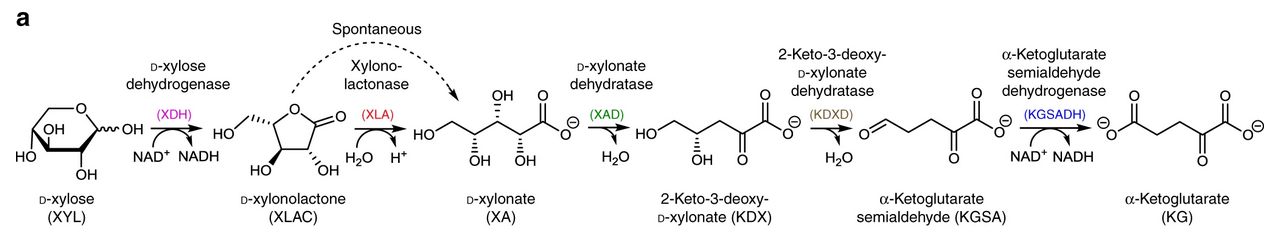


### Download the PySCeS format model from JWS Online

* Point your browser to https://jjj.bio.vu.nl
* Filter the database on model name: "Shen"
* Click the download dropdown menu for "Shen2" and select "PySCeS"
* Load the PySCeS model


In [2]:
model_description = '''
#reactions
v1:
 {1.0}NAD + {1.0}XYL = {1.0}XLAC
  (Eb*VmXDH*NAD*XYL)/(1000*KmXDHNAD*KmXDHXYL*(1 + (Ntot - NAD)/KmXDHNADH + NAD/KmXDHNAD)*(1 + XYL/KmXDHXYL + XLAC/KmXDHXLAC))
v2:
 {1.0}XLAC = {1.0}XA
  kXLA*XLAC
v3:
 {1.0}XLAC = {1.0}XA
  (Ec*VmXLA*XLAC)/(1000*KmXLAXLAC*(1 + XLAC/KmXLAXLAC + XA/KmXLAXA))
v4:
 {1.0}XA = {1.0}KDX
  (Ed*VmXAD*XA)/(1000*KmXADXA*(1 + (Ntot - NAD)/KiXADNADH)*(1 + KDX/KmXADKDX + XA/KmXADXA))
v5:
 {1.0}KDX = {1.0}KGSA
  (Ex*fracX*VmKDXD*KDX)/(1000*KmKDXDKDX*(1 + KGSA/KmKDXDKGSA + KDX/KmKDXDKDX)*(1 + KG/KiKDXDakg + LAC/KiKDXDLAC + PYR/KiKDXDPYR + XA/KiKDXDxylonate))
v6:
 {1.0}KGSA + {1.0}NAD = {1.0}KG
  Ea / 1000 * (VmKGSADH * KGSA * NAD / (KmKGSADHKGSA * KmKGSADHNAD)) / ((1 + KGSA / KmKGSADHKGSA + KG / KmKGSADHKG) * (1 + NAD / KmKGSADHNAD + (Ntot - NAD) / KmKGSADHNADH) + KDX / KmKGSADHKDX * (1 + NAD / KmKGSADHNAD + (Ntot - NAD) / KmKGSADHNADH2))
v7:
 {1.0}PYR = {1.0}NAD + {1.0}LAC
  kLDH*(Ntot - NAD)*PYR


#parameters
Ea = 10.0
Eb = 2.5
Ec = 0.8
Ed = 8.67
Ex = 0.5
fracX = 0.251104
KiKDXDakg = 14.7919
KiKDXDLAC = 27.9762
KiKDXDPYR = 17.9168
KiKDXDxylonate = 18.3001
KiXADNADH = 10.4629
kLDH = 10.0
KmKDXDKDX = 0.207656
KmKDXDKGSA = 0.288658
KmKGSADHKDX = 0.2136
KmKGSADHKG = 0.279059
KmKGSADHKGSA = 0.0217501
KmKGSADHNAD = 0.596286
KmKGSADHNADH = 0.2674
KmKGSADHNADH2 = 0.0241
KmXADKDX = 0.862428
KmXADXA = 0.793955
KmXDHNAD = 0.161239
KmXDHNADH = 0.0297091
KmXDHXLAC = 0.535734
KmXDHXYL = 0.19851
KmXLAXA = 0.0381004
KmXLAXLAC = 0.445269
kXLA = 0.00718272
Ntot = 8.0
VmKDXD = 107.075
VmKGSADH = 49.3374
VmXAD = 42.359
VmXDH = 119.743
VmXLA = 944.406
default = 1.0


#initial values
KDX = 0.0
KG = 0.0
KGSA = 0.0
LAC = 0.0
NAD = 8.0
PYR = 0.0
XA = 0.0
XLAC = 0.0
XYL = 5.0
'''

model = pysces.model('my_model', loader='string', fString=model_description)

Assuming extension is .psc
Using model directory: /root/Pysces/psc
Using file: my_model.psc
/root/Pysces/psc/orca/my_model.psc loading ..... 
Parsing file: /root/Pysces/psc/orca/my_model.psc
Info: No reagents have been fixed
Info: "default" has been initialised but does not occur in a rate equation
 
Calculating L matrix . . . . . . .  done.
Calculating K matrix . . . . . . . . .  done.
 


## Isolate the xylose dehydrogenase reaction "XDH" from the model

* The easiest way to do this is to edit the model in PySCeS and set the enzyme concentrations of the other enzymes to 0 (keep the XDH enzyme concentration at its default value of 2.5 ug/ml). The enzyme concentrations are denoted with "E." with . a, b, ,c, d, or x. Check in the respective rate equations which E. values should be set to 0.

* Simulate the ODEs for a time period 0 to 100, and plot the XYL and XLAC variables against time.

* Check de units for XYL in the simulation; VmXDH is given in U/mg, and E_XDH is given in ug/ml, t is given in minutes.

In [3]:
model_description = '''
#reactions
v1:
 {1.0}NAD + {1.0}XYL = {1.0}XLAC
  (Eb*VmXDH*NAD*XYL)/(1000*KmXDHNAD*KmXDHXYL*(1 + (Ntot - NAD)/KmXDHNADH + NAD/KmXDHNAD)*(1 + XYL/KmXDHXYL + XLAC/KmXDHXLAC))
v2:
 {1.0}XLAC = {1.0}XA
  kXLA*XLAC
v3:
 {1.0}XLAC = {1.0}XA
  (Ec*VmXLA*XLAC)/(1000*KmXLAXLAC*(1 + XLAC/KmXLAXLAC + XA/KmXLAXA))
v4:
 {1.0}XA = {1.0}KDX
  (Ed*VmXAD*XA)/(1000*KmXADXA*(1 + (Ntot - NAD)/KiXADNADH)*(1 + KDX/KmXADKDX + XA/KmXADXA))
v5:
 {1.0}KDX = {1.0}KGSA
  (Ex*fracX*VmKDXD*KDX)/(1000*KmKDXDKDX*(1 + KGSA/KmKDXDKGSA + KDX/KmKDXDKDX)*(1 + KG/KiKDXDakg + LAC/KiKDXDLAC + PYR/KiKDXDPYR + XA/KiKDXDxylonate))
v6:
 {1.0}KGSA + {1.0}NAD = {1.0}KG
  Ea / 1000 * (VmKGSADH * KGSA * NAD / (KmKGSADHKGSA * KmKGSADHNAD)) / ((1 + KGSA / KmKGSADHKGSA + KG / KmKGSADHKG) * (1 + NAD / KmKGSADHNAD + (Ntot - NAD) / KmKGSADHNADH) + KDX / KmKGSADHKDX * (1 + NAD / KmKGSADHNAD + (Ntot - NAD) / KmKGSADHNADH2))
v7:
 {1.0}PYR = {1.0}NAD + {1.0}LAC
  kLDH*(Ntot - NAD)*PYR


#parameters
Ea = 0
Eb = 2.5
Ec = 0
Ed = 0
Ex = 0
fracX = 0.251104
KiKDXDakg = 14.7919
KiKDXDLAC = 27.9762
KiKDXDPYR = 17.9168
KiKDXDxylonate = 18.3001
KiXADNADH = 10.4629
kLDH = 10.0
KmKDXDKDX = 0.207656
KmKDXDKGSA = 0.288658
KmKGSADHKDX = 0.2136
KmKGSADHKG = 0.279059
KmKGSADHKGSA = 0.0217501
KmKGSADHNAD = 0.596286
KmKGSADHNADH = 0.2674
KmKGSADHNADH2 = 0.0241
KmXADKDX = 0.862428
KmXADXA = 0.793955
KmXDHNAD = 0.161239
KmXDHNADH = 0.0297091
KmXDHXLAC = 0.535734
KmXDHXYL = 0.19851
KmXLAXA = 0.0381004
KmXLAXLAC = 0.445269
kXLA = 0.00718272
Ntot = 8.0
VmKDXD = 107.075
VmKGSADH = 49.3374
VmXAD = 42.359
VmXDH = 119.743
VmXLA = 944.406
default = 1.0


#initial values
KDX = 0.0
KG = 0.0
KGSA = 0.0
LAC = 0.0
NAD = 8.0
PYR = 0.0
XA = 0.0
XLAC = 0.0
XYL = 5.0
'''

model = pysces.model('my_model', loader='string', fString=model_description)

Assuming extension is .psc
Using model directory: /root/Pysces/psc
Using file: my_model.psc
/root/Pysces/psc/orca/my_model.psc loading ..... 
Parsing file: /root/Pysces/psc/orca/my_model.psc
Info: No reagents have been fixed
Info: "default" has been initialised but does not occur in a rate equation
 
Calculating L matrix . . . . . . .  done.
Calculating K matrix . . . . . . . . .  done.
 


LSODA time for 1000 points: 0.09523558616638184


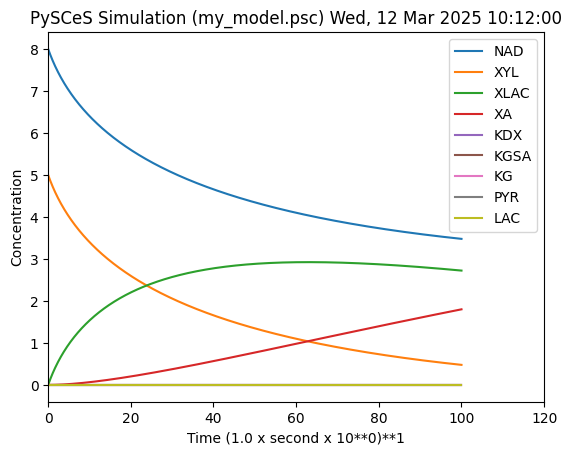

In [5]:
# Simulate the ODEs for a time period 0 to 100,


model.doSim(end=100, points = 1000)
model.SimPlot()

In [21]:
species, labels = model.data_sim.getSpecies(lbls=True)
result_model = pd.DataFrame(species, columns=[labels])
result_model

,Time,NAD,XYL,XLAC,XA,KDX,KGSA,KG,PYR,LAC
0,0.0000,8.000000,5.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
1,0.1001,7.972041,4.972041,0.027949,0.000010,0.0,0.0,-1.776357e-15,1.776357e-15,-1.776357e-15
2,0.2002,7.944648,4.944648,0.055312,0.000040,0.0,0.0,-8.881784e-16,-6.661338e-16,6.661338e-16
3,0.3003,7.917794,4.917794,0.082116,0.000089,0.0,0.0,-1.776357e-15,8.881784e-16,-8.881784e-16
4,0.4004,7.891454,4.891454,0.108388,0.000158,0.0,0.0,-1.776357e-15,4.440892e-16,-4.440892e-16
...,...,...,...,...,...,...,...,...,...,...
995,99.5996,3.481830,0.481830,2.726021,1.792149,0.0,0.0,2.664535e-15,2.664535e-14,-2.664535e-14
996,99.6997,3.480775,0.480775,2.725116,1.794109,0.0,0.0,3.552714e-15,2.486900e-14,-2.486900e-14
997,99.7998,3.479722,0.479722,2.724210,1.796068,0.0,0.0,3.552714e-15,2.176037e-14,-2.176037e-14
998,99.8999,3.478671,0.478671,2.723303,1.798026,0.0,0.0,3.552714e-15,1.776357e-14,-1.776357e-14


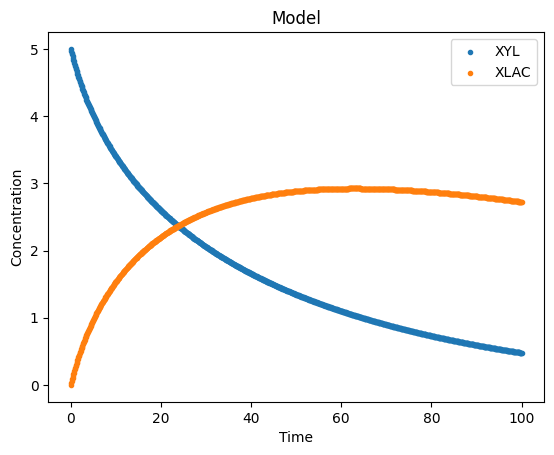

In [22]:
#  and plot the XYL and XLAC variables against time.
time = result_model.iloc[:,0]
xyl_model = result_model.iloc[:,2]
xlac_model = result_model.iloc[:,3]

plt.scatter(time, xyl_model, marker = '.', label='XYL')
plt.scatter(time, xlac_model, marker = '.', label='XLAC')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Model')
plt.legend()
plt.show()

# Check the units for XYL in the simulation; VmXDH is given in U/mg, and E_XDH is given in ug/ml, t is given in minutes.
# XYL / K_XYL is unitless, so XYL and K_XYL have the same unit, which is mM, which is millimol/liter


## Get the experimental data

* Go to https://fairdomhub.org and search for "Caulobacter crescentus", follow the link to "Caulobacter crescentus Weimberg pathway". Double click the "Progress curve analysis data" (under the "Progres curve XDH", and "Progres curves" sections). Download the "progress curve analysis data.xlsx" file.

* Import the data from the second sheet in the excel file and plot the XYL and XLAC concentrations for the first 90 minutes.

* Combine the experimental data and the model simulation plots.

In [23]:
#load the data
progress_curve_data = pd.read_excel('progress curve analysis data.xlsx', sheet_name='SEDML')
#filter the data
progress_curve_data = progress_curve_data[['time','XYL','XLAC']].dropna().drop(0)
progress_curve_data

,time,XYL,XLAC
1,0,4.959153,0.390631
2,4.5,4.428828,0.895908
3,9.5,3.690673,1.21832
4,14.5,3.137706,1.723935
5,19.5,2.386077,1.899154
6,24.5,2.118125,2.06121
7,29.5,1.652913,2.229673
8,34.5,1.469136,2.412909
9,39.5,1.259834,2.553838
10,44.5,1.022269,2.489564


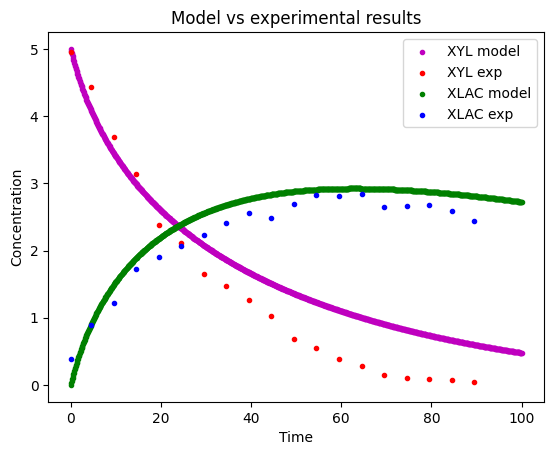

In [31]:
time_exp = progress_curve_data.iloc[:,0]
xyl_exp = progress_curve_data.iloc[:,1]
xlac_exp = progress_curve_data.iloc[:,2]

plt.scatter(time, xyl_model, marker = '.', c='m', label='XYL model')
plt.scatter(time_exp, xyl_exp, marker = '.', c='r', label='XYL exp')
plt.scatter(time, xlac_model, marker = '.', c='g', label='XLAC model')
plt.scatter(time_exp, xlac_exp, marker = '.',c='b', label='XLAC exp')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Model vs experimental results')
plt.legend()
plt.show()

## Simulate the effect of the two product inhibition terms

* Eliminate the effect of NADH, or XLAC, or both on the XDH rate equation. You can do this by changing the rate equation or by changing parameter values.

* Plot the four model simulations together with the experimental data.

* Which of the products has the biggest effect on the conversion rate of XYL to XLAC?

In [41]:
# Only XLAC removed
model_description2 = '''
#reactions
v1:
 {1.0}NAD + {1.0}XYL = {1.0}XLAC
  (Eb*VmXDH*NAD*XYL)/(1000*KmXDHNAD*KmXDHXYL*(1 + (Ntot - NAD)/KmXDHNADH + NAD/KmXDHNAD)*(1 + XYL/KmXDHXYL + XLAC/KmXDHXLAC))
# v2:
#  {1.0}XLAC = {1.0}XA
#   kXLA*XLAC
# v3:
#  {1.0}XLAC = {1.0}XA
#   (Ec*VmXLA*XLAC)/(1000*KmXLAXLAC*(1 + XLAC/KmXLAXLAC + XA/KmXLAXA))
# v4:
#  {1.0}XA = {1.0}KDX
#   (Ed*VmXAD*XA)/(1000*KmXADXA*(1 + (Ntot - NAD)/KiXADNADH)*(1 + KDX/KmXADKDX + XA/KmXADXA))
# v5:
#  {1.0}KDX = {1.0}KGSA
#   (Ex*fracX*VmKDXD*KDX)/(1000*KmKDXDKDX*(1 + KGSA/KmKDXDKGSA + KDX/KmKDXDKDX)*(1 + KG/KiKDXDakg + LAC/KiKDXDLAC + PYR/KiKDXDPYR + XA/KiKDXDxylonate))
# v6:
#  {1.0}KGSA + {1.0}NAD = {1.0}KG
#   Ea / 1000 * (VmKGSADH * KGSA * NAD / (KmKGSADHKGSA * KmKGSADHNAD)) / ((1 + KGSA / KmKGSADHKGSA + KG / KmKGSADHKG) * (1 + NAD / KmKGSADHNAD + (Ntot - NAD) / KmKGSADHNADH) + KDX / KmKGSADHKDX * (1 + NAD / KmKGSADHNAD + (Ntot - NAD) / KmKGSADHNADH2))
# v7:
#  {1.0}PYR = {1.0}NAD + {1.0}LAC
#   kLDH*(Ntot - NAD)*PYR


#parameters
Ea = 0
Eb = 2.5
Ec = 0
Ed = 0
Ex = 0
fracX = 0.251104
KiKDXDakg = 14.7919
KiKDXDLAC = 27.9762
KiKDXDPYR = 17.9168
KiKDXDxylonate = 18.3001
KiXADNADH = 10.4629
kLDH = 10.0
KmKDXDKDX = 0.207656
KmKDXDKGSA = 0.288658
KmKGSADHKDX = 0.2136
KmKGSADHKG = 0.279059
KmKGSADHKGSA = 0.0217501
KmKGSADHNAD = 0.596286
KmKGSADHNADH = 0.2674
KmKGSADHNADH2 = 0.0241
KmXADKDX = 0.862428
KmXADXA = 0.793955
KmXDHNAD = 0.161239
KmXDHNADH = 0.0297091
KmXDHXLAC = 1000#0.535734
KmXDHXYL = 0.19851
KmXLAXA = 0.0381004
KmXLAXLAC = 0.445269
kXLA = 0.00718272
Ntot = 8.0
VmKDXD = 107.075
VmKGSADH = 49.3374
VmXAD = 42.359
VmXDH = 119.743
VmXLA = 944.406
default = 1.0


#initial values
KDX = 0.0
KG = 0.0
KGSA = 0.0
LAC = 0.0
NAD = 8.0
PYR = 0.0
XA = 0.0
XLAC = 0.0
XYL = 5.0
'''

model2 = pysces.model('my_model2', loader='string', fString=model_description2)

# Only NADH removed
model_description3 = '''
#reactions
v1:
 {1.0}NAD + {1.0}XYL = {1.0}XLAC
  (Eb*VmXDH*NAD*XYL)/(1000*KmXDHNAD*KmXDHXYL*(1 + (Ntot - NAD)/KmXDHNADH + NAD/KmXDHNAD)*(1 + XYL/KmXDHXYL + XLAC/KmXDHXLAC))
# v2:
#  {1.0}XLAC = {1.0}XA
#   kXLA*XLAC
# v3:
#  {1.0}XLAC = {1.0}XA
#   (Ec*VmXLA*XLAC)/(1000*KmXLAXLAC*(1 + XLAC/KmXLAXLAC + XA/KmXLAXA))
# v4:
#  {1.0}XA = {1.0}KDX
#   (Ed*VmXAD*XA)/(1000*KmXADXA*(1 + (Ntot - NAD)/KiXADNADH)*(1 + KDX/KmXADKDX + XA/KmXADXA))
# v5:
#  {1.0}KDX = {1.0}KGSA
#   (Ex*fracX*VmKDXD*KDX)/(1000*KmKDXDKDX*(1 + KGSA/KmKDXDKGSA + KDX/KmKDXDKDX)*(1 + KG/KiKDXDakg + LAC/KiKDXDLAC + PYR/KiKDXDPYR + XA/KiKDXDxylonate))
# v6:
#  {1.0}KGSA + {1.0}NAD = {1.0}KG
#   Ea / 1000 * (VmKGSADH * KGSA * NAD / (KmKGSADHKGSA * KmKGSADHNAD)) / ((1 + KGSA / KmKGSADHKGSA + KG / KmKGSADHKG) * (1 + NAD / KmKGSADHNAD + (Ntot - NAD) / KmKGSADHNADH) + KDX / KmKGSADHKDX * (1 + NAD / KmKGSADHNAD + (Ntot - NAD) / KmKGSADHNADH2))
# v7:
#  {1.0}PYR = {1.0}NAD + {1.0}LAC
#   kLDH*(Ntot - NAD)*PYR


#parameters
Ea = 0
Eb = 2.5
Ec = 0
Ed = 0
Ex = 0
fracX = 0.251104
KiKDXDakg = 14.7919
KiKDXDLAC = 27.9762
KiKDXDPYR = 17.9168
KiKDXDxylonate = 18.3001
KiXADNADH = 10.4629
kLDH = 10.0
KmKDXDKDX = 0.207656
KmKDXDKGSA = 0.288658
KmKGSADHKDX = 0.2136
KmKGSADHKG = 0.279059
KmKGSADHKGSA = 0.0217501
KmKGSADHNAD = 0.596286
KmKGSADHNADH = 0.2674
KmKGSADHNADH2 = 0.0241
KmXADKDX = 0.862428
KmXADXA = 0.793955
KmXDHNAD = 0.161239
KmXDHNADH = 1000#0.0297091
KmXDHXLAC = 0.535734
KmXDHXYL = 0.19851
KmXLAXA = 0.0381004
KmXLAXLAC = 0.445269
kXLA = 0.00718272
Ntot = 8.0
VmKDXD = 107.075
VmKGSADH = 49.3374
VmXAD = 42.359
VmXDH = 119.743
VmXLA = 944.406
default = 1.0


#initial values
KDX = 0.0
KG = 0.0
KGSA = 0.0
LAC = 0.0
NAD = 8.0
PYR = 0.0
XA = 0.0
XLAC = 0.0
XYL = 5.0
'''

model3 = pysces.model('my_model', loader='string', fString=model_description3)

# Both NADH and XLAC removed
model_description4 = '''
#reactions
v1:
 {1.0}NAD + {1.0}XYL = {1.0}XLAC
  (Eb*VmXDH*NAD*XYL)/(1000*KmXDHNAD*KmXDHXYL*(1 + (Ntot - NAD)/KmXDHNADH + NAD/KmXDHNAD)*(1 + XYL/KmXDHXYL + XLAC/KmXDHXLAC))
# v2:
#  {1.0}XLAC = {1.0}XA
#   kXLA*XLAC
# v3:
#  {1.0}XLAC = {1.0}XA
#   (Ec*VmXLA*XLAC)/(1000*KmXLAXLAC*(1 + XLAC/KmXLAXLAC + XA/KmXLAXA))
# v4:
#  {1.0}XA = {1.0}KDX
#   (Ed*VmXAD*XA)/(1000*KmXADXA*(1 + (Ntot - NAD)/KiXADNADH)*(1 + KDX/KmXADKDX + XA/KmXADXA))
# v5:
#  {1.0}KDX = {1.0}KGSA
#   (Ex*fracX*VmKDXD*KDX)/(1000*KmKDXDKDX*(1 + KGSA/KmKDXDKGSA + KDX/KmKDXDKDX)*(1 + KG/KiKDXDakg + LAC/KiKDXDLAC + PYR/KiKDXDPYR + XA/KiKDXDxylonate))
# v6:
#  {1.0}KGSA + {1.0}NAD = {1.0}KG
#   Ea / 1000 * (VmKGSADH * KGSA * NAD / (KmKGSADHKGSA * KmKGSADHNAD)) / ((1 + KGSA / KmKGSADHKGSA + KG / KmKGSADHKG) * (1 + NAD / KmKGSADHNAD + (Ntot - NAD) / KmKGSADHNADH) + KDX / KmKGSADHKDX * (1 + NAD / KmKGSADHNAD + (Ntot - NAD) / KmKGSADHNADH2))
# v7:
#  {1.0}PYR = {1.0}NAD + {1.0}LAC
#   kLDH*(Ntot - NAD)*PYR


#parameters
Ea = 0
Eb = 2.5
Ec = 0
Ed = 0
Ex = 0
fracX = 0.251104
KiKDXDakg = 14.7919
KiKDXDLAC = 27.9762
KiKDXDPYR = 17.9168
KiKDXDxylonate = 18.3001
KiXADNADH = 10.4629
kLDH = 10.0
KmKDXDKDX = 0.207656
KmKDXDKGSA = 0.288658
KmKGSADHKDX = 0.2136
KmKGSADHKG = 0.279059
KmKGSADHKGSA = 0.0217501
KmKGSADHNAD = 0.596286
KmKGSADHNADH = 0.2674
KmKGSADHNADH2 = 0.0241
KmXADKDX = 0.862428
KmXADXA = 0.793955
KmXDHNAD = 0.161239
KmXDHNADH = 1000#0.0297091
KmXDHXLAC = 1000#0.535734
KmXDHXYL = 0.19851
KmXLAXA = 0.0381004
KmXLAXLAC = 0.445269
kXLA = 0.00718272
Ntot = 8.0
VmKDXD = 107.075
VmKGSADH = 49.3374
VmXAD = 42.359
VmXDH = 119.743
VmXLA = 944.406
default = 1.0


#initial values
KDX = 0.0
KG = 0.0
KGSA = 0.0
LAC = 0.0
NAD = 8.0
PYR = 0.0
XA = 0.0
XLAC = 0.0
XYL = 5.0
'''

model4 = pysces.model('my_model', loader='string', fString=model_description4)

# # Simulate the ODEs for a time period 0 to 100,
model2.doSim(end=100, points = 1000)
model3.doSim(end=100, points = 1000)
model4.doSim(end=100, points = 1000)
# model2.SimPlot()



Assuming extension is .psc
Using model directory: /root/Pysces/psc
Using file: my_model2.psc
/root/Pysces/psc/orca/my_model2.psc loading ..... 
Parsing file: /root/Pysces/psc/orca/my_model2.psc
Info: No reagents have been fixed
Info: "Ea" has been initialised but does not occur in a rate equation
Info: "Ec" has been initialised but does not occur in a rate equation
Info: "Ed" has been initialised but does not occur in a rate equation
Info: "Ex" has been initialised but does not occur in a rate equation
Info: "fracX" has been initialised but does not occur in a rate equation
Info: "KiKDXDakg" has been initialised but does not occur in a rate equation
Info: "KiKDXDLAC" has been initialised but does not occur in a rate equation
Info: "KiKDXDPYR" has been initialised but does not occur in a rate equation
Info: "KiKDXDxylonate" has been initialised but does not occur in a rate equation
Info: "KiXADNADH" has been initialised but does not occur in a rate equation
Info: "kLDH" has been initial

/usr/local/lib/python3.11/dist-packages/pysces/PyscesModel.py:4058: ODEintWarning: Integration successful.
  sim_res, infodict = scipy.integrate.odeint(


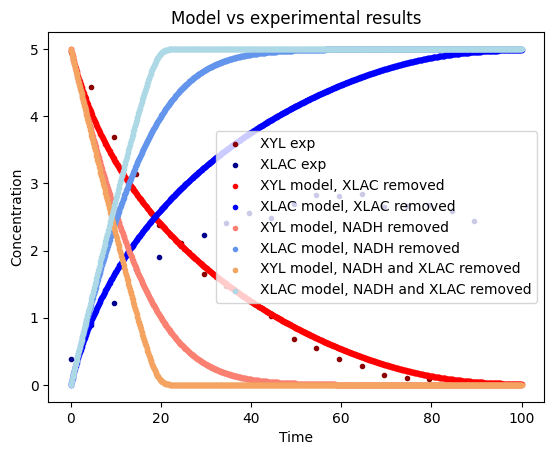

In [48]:
species, labels = model2.data_sim.getSpecies(lbls=True)
result_model_XLAC = pd.DataFrame(species, columns=[labels])
species, labels = model3.data_sim.getSpecies(lbls=True)
result_model_NADH = pd.DataFrame(species, columns=[labels])
species, labels = model4.data_sim.getSpecies(lbls=True)
result_model_NADH_XLAC = pd.DataFrame(species, columns=[labels])
time2 = result_model_NADH_XLAC.iloc[:,0]
xyl_model2 = result_model_XLAC.iloc[:,2]
xlac_model2 = result_model_XLAC.iloc[:,3]
xyl_model3 = result_model_NADH.iloc[:,2]
xlac_model3 = result_model_NADH.iloc[:,3]
xyl_model4 = result_model_NADH_XLAC.iloc[:,2]
xlac_model4 = result_model_NADH_XLAC.iloc[:,3]


plt.scatter(time_exp, xyl_exp, marker = '.',c='darkred', label='XYL exp')
plt.scatter(time_exp, xlac_exp, marker = '.',c='darkblue', label='XLAC exp')
plt.scatter(time2, xyl_model2, marker = '.',c='red', label='XYL model, XLAC removed')
plt.scatter(time2, xlac_model2, marker = '.',c='blue', label='XLAC model, XLAC removed')
plt.scatter(time2, xyl_model3, marker = '.',c='salmon', label='XYL model, NADH removed')
plt.scatter(time2, xlac_model3, marker = '.',c='cornflowerblue', label='XLAC model, NADH removed')
plt.scatter(time2, xyl_model4, marker = '.',c='sandybrown', label='XYL model, NADH and XLAC removed')
plt.scatter(time2, xlac_model4, marker = '.',c='lightblue', label='XLAC model, NADH and XLAC removed')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Model vs experimental results')
plt.legend()
plt.show()

## Effect of Xylonolactonase (XLA)

* Simulate the complete model (use the default enzyme concentrations) and plot the intermediates KDX, KG, KGSA, NAD, XA, XLAC, XYL against time, for a time period of 500 minutes.

* Set the enzyme concentration of the XLA reaction to 0, and plot the intermediate concentrations again.

* Plot the KGSA concentration for both simulations together, is there a big difference in the formation rate of this product?

* Plot the XLAC concentration for both simulations together. Explain why "deleting" the XLA has only little effect on the final product formation rate.

* Repeat these steps at a 10x higher concentration of all enzymes.


## Effect of NAD recycling

* Which reaction catalyses the NAD recycling in the system, and why is it not active in the default Shen2 model?

* Switch the recycling system on at a sufficiently high activity that the NAD concentration remains essentially constant during KG production.

* Compare the KG production rate with and without NAD recycling.

## Pathway optimisation

* The total protein concentration in the system is equal to Et = Ea + Eb + Ec + Ed + Ex. While keeping Et constant, redistribute protein over the enzymes (i.e. you can change Ea Eb Ec Ed and Ex but the sum must remain constant), and try to minimize the time it takes for maximal conversion of XYL to KG. Do the same optimisation in absence or presence of NAD recycling.
